In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create & train the model
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


# Pruning

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree model without pruning
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Make predictions before pruning
y_pred_before = tree.predict(X_test)
print("Accuracy before pruning:", accuracy_score(y_test, y_pred_before))

# Perform post-pruning using Cost-Complexity Pruning
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Alpha values for pruning

# Train a pruned tree
pruned_tree = DecisionTreeClassifier(ccp_alpha=0.1)  # Use the second-to-last alpha
pruned_tree.fit(X_train, y_train)

# Make predictions after pruning
y_pred_after = pruned_tree.predict(X_test)
print("Accuracy after pruning:", accuracy_score(y_test, y_pred_after))

Accuracy before pruning: 1.0
Accuracy after pruning: 0.9777777777777777


In [2]:
path.ccp_alphas

array([0.        , 0.00923521, 0.01269841, 0.01269841, 0.01847042,
       0.02705804, 0.25028684, 0.31210884])

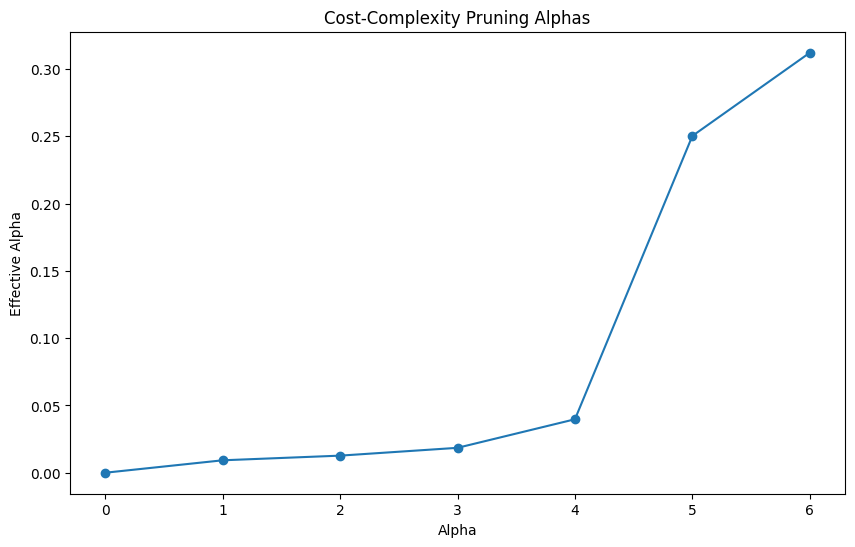

In [7]:
import matplotlib.pyplot as plt

# Plot the ccp_alphas
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Effective Alpha")
plt.title("Cost-Complexity Pruning Alphas")
plt.show()

<bound method BaseDecisionTree.cost_complexity_pruning_path of DecisionTreeClassifier()>